In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pickle

from os.path import abspath, dirname, join
from os import getcwd


PARENT_DIR = dirname(getcwd())

with open(join(PARENT_DIR,'cultivar_models/Skyfall_Yield_model_daily_3d.pck'), 'rb') as pfile1:
    skyfall = pickle.load(pfile1)

df = pd.read_csv(join(PARENT_DIR, 'All_Cultivars_Spreadsheets/all_cultivars.csv'))

print(df)

# read in the weather, calculate avg weather for region/area/site/ year

      Cultivar            Region    Region County       Lat    Long  Year  \
0       Access             OLD'M             ABER  57.33492 -2.3199  2002   
1       Access            Ragnal  Nottinghamshire  53.25560 -0.7963  2004   
2       Access  Little Staughton     Bedfordshire  52.25040 -0.3821  2004   
3       Access          Limavady      Londonderry  55.04550 -6.9337  2003   
4       Access          Limavady           LDERRY  55.04550 -6.9337  2002   
...        ...               ...              ...       ...     ...   ...   
16861     Zulu               Wye             Kent  51.18190  0.9379  2015   
16862     Zulu            Callow           Herefd  52.00510 -2.7385  2017   
16863     Zulu            Morley            Norfk  52.55470  1.0396  2015   
16864     Zulu            Morley            Norfk  52.55470  1.0396  2016   
16865     Zulu          Balgonie             Fife  56.18430 -3.1244  2013   

      Sow Month  Ripe Time  Yield  
0          1/10      342.0   8.82  
1  

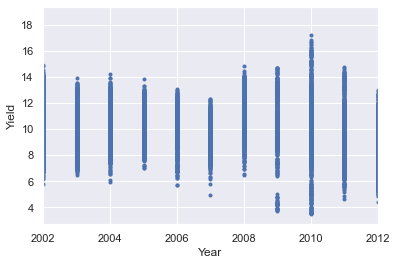

In [44]:
plt.plot('Year', 'Yield', data = df, marker = '.', linestyle='none')
plt.xlabel('Year')
plt.ylabel('Yield')
plt.xlim(2002,2012)
plt.show()


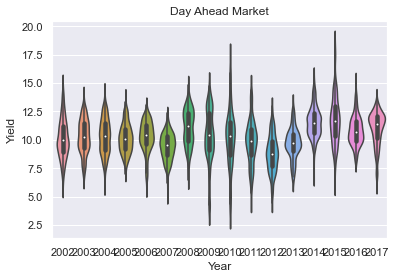

In [45]:
sns.set()

fig, axes = plt.subplots()
sns.violinplot('Year', 'Yield', data = df, ax = axes)
axes.set_title('Yield by Year')

axes.yaxis.grid(True)

plt.show()



## TODO: add in the avg sun rain and temp for the year maybe per location? violin
# weather at a site, avg yield < - learns from the data, 

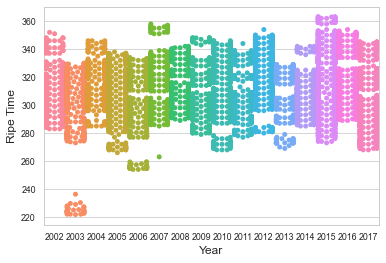

In [27]:
#fig, ax = plt.subplots() < look up
#ax.xaxis.set_ticks(np.arange(2002, 2017, step = 2))
p = sns.swarmplot(x='Year', y='Ripe Time', data = df)
#p.set_xticks(range(8)) < limit ticks to 8
#p.set_xticklabels([str(x) for x in range(2002,2018,2)]) < only did the firt 8 ticks with alt labels.
#p.set_xticklabels([str(x) for x in range(2,18,1)])
#plt.xtick_labels([str(x) for x in range(2002,2018,2)]) < do it in plt  - 
plt.show()



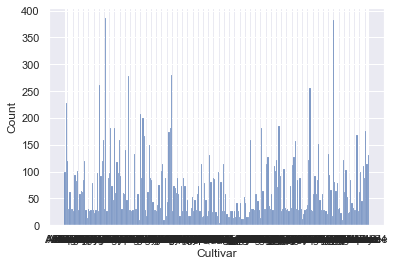

<Figure size 7200x36000 with 0 Axes>

In [94]:
fig, axes = plt.subplots()
sns.histplot(df.Cultivar)
plt.figure(figsize=(100,500))
plt.show()


# size

Index(['Cordiale', 'Solstice', 'Jb Diego', 'Einstein', 'Claire', 'Robigus',
       'Alchemy', 'Gallant', 'Gladiator', 'Oakley', 'Crusoe', 'Istabraq',
       'Deben', 'Malacca', 'Xi19', 'Invicta', 'Viscount', 'Glasgow', 'Dickens',
       'Leeds', 'Consort', 'Revelation', 'Scout', 'Grafton', 'Duxford',
       'Evolution', 'Skyfall', 'Zulu', 'Kws Santiago', 'Monterey', 'Relay',
       'Richmond', 'Niijinsky', 'Tanker', 'Conqueror', 'Ambrosia', 'Brompton',
       'Delphi', 'Zebedee', 'Mascot', 'Humber', 'Kws Trinity', 'Kws Lili',
       'Reflection', 'Myriad', 'Welford', 'Panorama', 'Timber', 'Horatio',
       'Beluga', 'Napier'],
      dtype='object')
      Cultivar    Region    Region County       Lat    Long  Year Sow Month  \
99     Alchemy   Ragnall  Nottinghamshire  53.25560 -0.7963  2005      1/10   
100    Alchemy   Ccreevy             Down  53.79448 -6.0760  2010      8/10   
101    Alchemy    StBosw           ScBord  55.57080 -2.6475  2014      30/9   
102    Alchemy    StBosw   

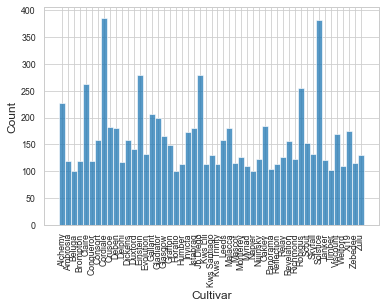

In [20]:
'''Showing the Cultivars with more than 100 records'''

a = df.Cultivar.value_counts()
a = a[a > 100].index # .index, gives the list of the ones we're interested in
print(a)
b=df[df.Cultivar.isin(a)]
print(b)
p = sns.histplot(b.Cultivar)
#p.set_xticks(p.get_xticklabels(),rotation = 30)
plt.xticks(rotation = 90)
plt.show()


#figure out the

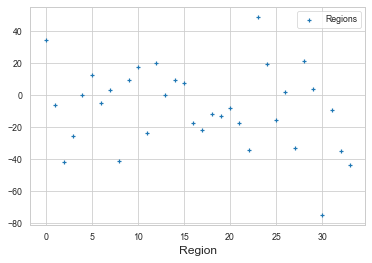

In [29]:
def plot_validation(simfarm):
    fig = plt.figure()
    ax = fig.add_subplot(111)

    ax.scatter(np.arange(simfarm.preds.size), simfarm.resi, marker="+", label="Regions") # the size of the yield predictions(gaussian)
    # ax.axhline(np.mean(simfarm.resi), linestyle="-", color="k", label="Mean")
    # ax.axhline(np.median(simfarm.resi), linestyle="--", color="k", label="Median")

    ax.set_xlabel("Region")
    # ax.set_ylabel("$1 - Y_{\mathrm{Pred}} / Y_{\mathrm{True}}$ (%)")

    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels)

    fig.savefig(
        join(
            PARENT_DIR, "scripts",
            f"Validation{simfarm.cult}.png"),
        bbox_inches="tight")

    return fig

# get the residual - mean


plot = plot_validation(skyfall)
plot.show()

## Regions are only seperate residuals, not connected to actual lat/long?? check order?, index  related 

plot = simfarm.preds.size

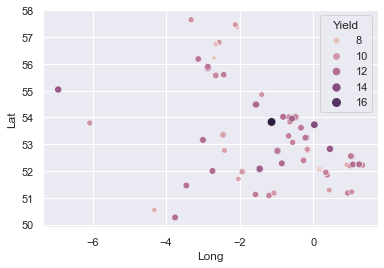

In [60]:
'''Find the regions of Skyfall, showing yield by Region'''

df = df[df.Cultivar == 'Skyfall']
# print(df)
sns.scatterplot(df.Long, df.Lat, size =df.Yield, hue=df.Yield)
plt.show()

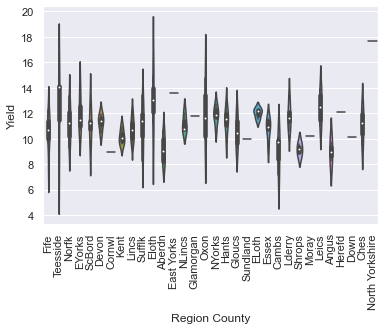

In [80]:
df = df[df.Cultivar == 'Skyfall']
# print(df)
# sns.scatterplot(df['Region County'], df.Yield, hue = df.Yield)
sns.violinplot('Region County', 'Yield', data = df)
plt.xticks(rotation=90)
plt.show()

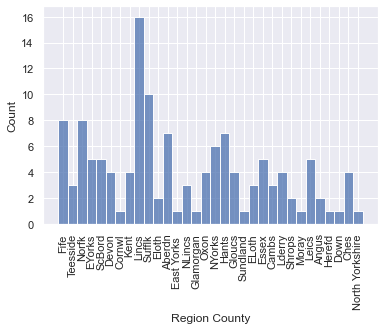

32


In [69]:
sns.histplot(data=df, x=df['Region County'])
plt.xticks(rotation = 90)
plt.show()
a = df['Region County'].unique()
print(len(a))

In [5]:
'''the different between 1 - predicted/observed
so when the prediction is the same as the observed it will be 0'''
def print_yield(simfarm):
    simfarm.preds

print(skyfall.resi)


14281    34.486092
14328    -6.087726
14300   -41.950269
14271   -25.353731
14287    -0.061146
14309    12.584835
14288    -4.686850
14292     3.347938
14244   -41.155819
14294     9.254797
14296    17.564703
14356   -23.473378
14233    19.929289
14269     0.296147
14286     9.751328
14235     7.602990
14246   -17.315373
14310   -21.385401
14298   -11.718994
14342   -13.016918
14262    -7.941224
14242   -17.262047
14318   -34.070987
14354    48.971389
14312    19.763797
14314   -15.674359
14326     1.800716
14243   -32.860464
14332    21.666255
14327     3.719614
14303   -74.555844
14308    -9.130433
14248   -34.711138
14353   -43.555569
Name: Yield, dtype: float64


In [93]:
print(skyfall.preds)

[ 7.8420148  11.8712165  13.98210147 11.63282626 10.7865915   9.5195115
 12.53101593 11.03766552 11.67358626 10.49921993 10.78253678 12.17447504
  9.82467626 10.46890455 10.97423846 11.15231915 12.11867804 11.60444435
 11.81986961 12.03630175 12.97453508 12.887099   13.54116964  9.0116527
 10.22209232 12.37715639 12.35346997 11.85115336  8.33471047 11.08187239
 13.38843324 10.65113023 11.24838001 12.96306784]


In [68]:
import simfarm
type(skyfall.predict_yields)
print(skyfall.predict_yields)
print(len(skyfall.predict_yields))

14281    11.97
14328    11.19
14300     9.85
14271     9.28
14287    10.78
14309    10.89
14288    11.97
14292    11.42
14244     8.27
14294    11.57
14296    13.08
14356     9.86
14233    12.27
14269    10.50
14286    12.16
14235    12.07
14246    10.33
14310     9.56
14298    10.58
14342    10.65
14262    12.02
14242    10.99
14318    10.10
14354    17.66
14312    12.74
14314    10.70
14326    12.58
14243     8.92
14332    10.64
14327    11.51
14303     7.67
14308     9.76
14248     8.35
14353     9.03
Name: Yield, dtype: float64
34


In [107]:
df = df[df.Cultivar =='Skyfall']
orig_yields = df.Yield.filter(items=skyfall.predict_yields.index, axis=0) # keep only the index values that match
orig_yields_2 = df.Yield[skyfall.predict_yields.index] # index into df.Yield using predict_yield index i.e without filter
print(pd.Series.equals(orig_yields, skyfall.predict_yields))
comp = pd.Series.compare(orig_yields_2 *4 , skyfall.predict_yields)
print(comp)
print(len(comp))
# print(orig_yields_2)
# print(dir(comp)) # to get callable options


# print(skyfall.predict_yields.index)
type(df.Yield)
print(f'Residual Mean: {np.mean(skyfall.resi):.3f}')
print(f'Residual Median: {np.median(skyfall.predict_yields):.3f}')
#print(df.compare(df.Yield,skyfall.predict_yields)) <- wrong needed to be pd.series

True
        self  other
14281  47.88  11.97
14328  44.76  11.19
14300  39.40   9.85
14271  37.12   9.28
14287  43.12  10.78
14309  43.56  10.89
14288  47.88  11.97
14292  45.68  11.42
14244  33.08   8.27
14294  46.28  11.57
14296  52.32  13.08
14356  39.44   9.86
14233  49.08  12.27
14269  42.00  10.50
14286  48.64  12.16
14235  48.28  12.07
14246  41.32  10.33
14310  38.24   9.56
14298  42.32  10.58
14342  42.60  10.65
14262  48.08  12.02
14242  43.96  10.99
14318  40.40  10.10
14354  70.64  17.66
14312  50.96  12.74
14314  42.80  10.70
14326  50.32  12.58
14243  35.68   8.92
14332  42.56  10.64
14327  46.04  11.51
14303  30.68   7.67
14308  39.04   9.76
14248  33.40   8.35
14353  36.12   9.03
34
Residual Mean: -7.801
Residual Median: 10.740


In [37]:
# need to define
flat_samples = skyfall.model.get_chain(discard=1000, thin=100, flat=True)


# needed to print errors below
# Extract the errors on the fitted parameters
skyfall.param_errors = np.std(flat_samples, axis=0)
mu_t_err, sig_t_err, mu_p_err, sig_p_err, mu_s_err, sig_s_err, rho_tp_err, rho_ts_err, rho_ps_err = skyfall.param_errors


# print outputs
print("================ Model Parameters ================")
print("mu_t (mean temperature +/- error) = %.3f +/- %.3f" % (skyfall.mean_params["mu_t"], mu_t_err))
print("sig_t (standard deviation temperature +/- error) = %.3f +/- %.3f" % (skyfall.mean_params["sig_t"], sig_t_err))
print("mu_p (mean precipitation +/- error) = %.3f +/- %.3f" % (skyfall.mean_params["mu_p"], mu_p_err))
print("sig_p (standard deviation precipitation +/- error) = %.3f +/- %.3f" % (skyfall.mean_params["sig_p"], sig_p_err))
print("mu_s (mean sunshine +/- error) = %.3f +/- %.3f" % (skyfall.mean_params["mu_s"], mu_s_err))
print("sig_s (standard deviation sunshine +/- error) = %.3f +/- %.3f" % (skyfall.mean_params["sig_s"], sig_s_err))
print("rho_tp (temperature and precipitation correlation +/- error) = %.3f +/- %.3f" % (
            skyfall.mean_params["rho_tp"], rho_tp_err))
print("rho_ts (temperature and sunshine correlation +/- error) = %.3f +/- %.3f" % (
            skyfall.mean_params["rho_ts"], rho_ts_err))
print("rho_ps (precipitation and sunshine correlation +/- error) = %.3f +/- %.3f" % (
            skyfall.mean_params["rho_ps"], rho_ps_err))

            #  what is the error telling me and why is it sooo huge???

================ Model Parameters ================
mu_t (mean temperature +/- error) = 806.583 +/- 176.745
sig_t (standard deviation temperature +/- error) = 626.067 +/- 84.561
mu_p (mean precipitation +/- error) = 891.480 +/- 93.992
sig_p (standard deviation precipitation +/- error) = 706.031 +/- 64.061
mu_s (mean sunshine +/- error) = 1623.455 +/- 120.879
sig_s (standard deviation sunshine +/- error) = 609.600 +/- 87.223
rho_tp (temperature and precipitation correlation +/- error) = -0.169 +/- 0.148
rho_ts (temperature and sunshine correlation +/- error) = -0.007 +/- 0.141
rho_ps (precipitation and sunshine correlation +/- error) = -0.070 +/- 0.142


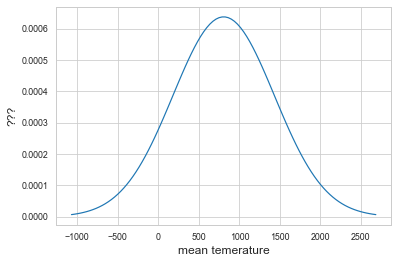

In [120]:
# printing the learned(?) temp distribution

import scipy.stats as stats

fig = plt.figure()
ax = fig.add_subplot(111)

mu = skyfall.mean_params["mu_t"]
sigma = skyfall.mean_params["sig_t"]
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
ax.set_xlabel('mean temerature')
ax.set_ylabel('???')

plt.show()

# what location/year? -ve temp?

In [51]:
print(len(skyfall.train_yields)) # 70% for training
print(len(skyfall.predict_yields)) # 30% for validations
print(skyfall.yield_data)
print(skyfall.therm_days.shape) # showing its just 1d

98
34
14240    11.46
14281    11.97
14238    11.36
14252    10.47
14239     8.92
         ...  
14339     8.09
14307    10.68
14362     9.86
14353     9.03
14305    10.24
Name: Yield, Length: 132, dtype: float64
(132,)


In [64]:
rand_inds = np.random.choice(np.arange(skyfall.therm_days.size), int(skyfall.therm_days.size * 0.3)) # pick random sample of 30% in rang 0-132 (skyfall sample size)
okinds = np.zeros(skyfall.therm_days.size, dtype=bool)
print(okinds)
okinds[rand_inds] = True
print(rand_inds)
print(okinds) # boolean mask, filter on actual dataset

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False]
[106  87  82  67  71 111 109  90  25  58   5  46  44 109  31  49  90  11
  86  92 112  28  94  54 125  57   4  24  23 107  98  34  58 108  97  40
  28  52  60]
[False False False False  True  True

In [99]:
print(skyfall.predict_rain)

[1579.93504042  760.38460353  617.52766964  617.54037518  460.03363464
  357.64344729  743.54820001  619.44955699  573.55036087  529.92407135
  538.00693551  614.82864597  447.95105783  510.7121145   602.78362513
  541.73214947  629.48767572  662.68920228  541.47305785  798.66634071
  640.12233467  523.36327167  904.64691703  445.98497218  639.0248249
  695.65202971  656.82290251  659.35415848 1340.15060987  675.66295807
  562.8258176  1191.22455017  810.44822678  987.54568327]


In [112]:
print(df.Year.unique()) # ALL SKYFALL values only contain these years
print(df.Region.unique()) # AND these regions
print(df.Region.unique().size)
print(df.shape)
print(df)

print(skyfall.preds.size)


[2015 2016 2013 2017 2014]
['Elie' 'Croft' 'Morley' 'Tibthorpe' 'StBosw' 'WCharlt' 'SClims' 'Wye'
 'Ulceby' 'Elmswell' 'GSturton' 'Humbie' 'Luthermr' 'Cowbridge' 'Alkerton'
 'Fridaythorpe' 'Barthorpe' 'Framling' 'Withernsea' 'Wolfertn' 'Welbourn'
 'Broughtn' 'Coates' 'Burdon' 'Stowmrkt' 'Barnston' 'Didbrook' 'Thaxted'
 'Ickleton' 'Spalding' 'Mendlesham' 'Bedfield' 'Baumber' 'Limavad'
 'Petham' 'Edgmond' 'Anstruth' 'Elgin' 'Frisby' 'Auchnagatt' 'Brechin'
 'Callow' 'Cawood' 'Sancton' 'Balgonie' 'Ccreevy' 'North Dalton'
 'Nether Wallop' 'Kelso' 'East Malling' 'Ellon' 'Hlegh' 'Burkham'
 'Deopham' 'Itchen Stoke' 'Hailes' 'Moulton' 'Pinchbeck' 'Frsthrp'
 'Saltoun']
60
(132, 9)
      Cultivar      Region Region County      Lat    Long  Year Sow Month  \
14233  Skyfall        Elie          Fife  52.3995 -0.2624  2015     13/10   
14234  Skyfall       Croft      Teesside  54.4835 -1.5551  2015      25/9   
14235  Skyfall      Morley         Norfk  52.5547  1.0396  2015      2/10   
14236  Skyfa

In [113]:
print(skyfall.mean_params)
type(skyfall.mean_params)

{'mu_t': 806.5827883217663, 'sig_t': 626.0673260328231, 'mu_p': 891.4803365156233, 'sig_p': 706.0311223396898, 'mu_s': 1623.4545588917804, 'sig_s': 609.6003049503736, 'rho_tp': -0.16908405064198928, 'rho_ts': -0.0067972470290862536, 'rho_ps': -0.07023846486755189}


dict